## Task/end-Goal
* Be able to predict an indivuduals gender (Binary; Male or Female) correctly based on certain characteristics

In [119]:
# Importing important Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as knn
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('gender_classification_v7.csv')

In [4]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


## EDA - Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [7]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Grouping the data frame into male and female for comparison of attributes
genders = data.groupby('gender')

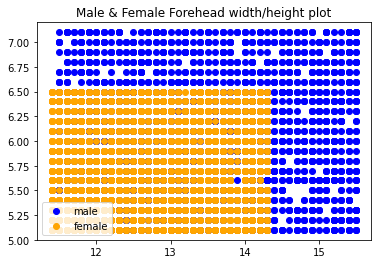

In [9]:
# Breaking data into male and female
male = genders.get_group('Male')
female = genders.get_group('Female')

plt.scatter(male.forehead_width_cm, male.forehead_height_cm, c='blue', label='male')
plt.scatter(female.forehead_width_cm, female.forehead_height_cm, c='orange', label='female')
plt.legend(['male', 'female'], loc = 'lower left')
plt.title('Male & Female Forehead width/height plot')
plt.show()

Forehead width and height are important factors to consider as the plot above suggests; Females tend to have smaller foreheads than male.

In [10]:
print('number of males ',male.__len__())
print('number of females ',female.__len__())

number of males  2500
number of females  2501


In [11]:
# Counting number of males and females with wide and narrow nose.
# 0 stands for no/false, 1 stands for true/yes.
nose_wide_count = genders['nose_wide'].value_counts()
nose_wide_count

gender  nose_wide
Female  0            2214
        1             287
Male    1            2183
        0             317
Name: nose_wide, dtype: int64

In [12]:
# Dataframe showing percentage widness/thinness of nose by gender
# using normalize='index' normalizes by dividing all values by the sum of 'index' values.... Calculates percentage
pd.crosstab(data['gender'], data['nose_wide'], normalize='index')

nose_wide,0,1
gender,,
Female,0.885246,0.114754
Male,0.126800,0.873200


* From the table above, the data suggests that males generally have wider nose than females.
Out of 5001 samples comprising of 2500 males and 2501 females
    - 11% of females have wide nose, 88% have narrow nostrils
    - 87% of males have wide nostrils, 12% have narrow nostrils
* Widness of nose is a key factor to consider as there seems to be a polarity in widness of nose for both genders

In [13]:
# Counting number of males and females with long hair
long_hair_count = genders['long_hair'].value_counts()
long_hair_count

gender  long_hair
Female  1            2184
        0             317
Male    1            2165
        0             335
Name: long_hair, dtype: int64

In [14]:
pd.crosstab(data['gender'], data['long_hair'], normalize='index')

long_hair,0,1
gender,,
Female,0.126749,0.873251
Male,0.134000,0.866000


* Hair length is not an important feature to consider as
    - 12% of females have short hair, 87% have long hair
    - 13% of males have short hair, 12% have long hair
* Both genders seem to have the same type of hair length at almost equal percent so hair length is not a determining factor

In [15]:
# Counting number of males and females with long nose
nose_long_count = genders['nose_long'].value_counts()
nose_long_count

gender  nose_long
Female  0            2161
        1             340
Male    1            2200
        0             300
Name: nose_long, dtype: int64

In [16]:
pd.crosstab(data['gender'], data['nose_long'], normalize='index')

nose_long,0,1
gender,,
Female,0.864054,0.135946
Male,0.120000,0.880000


* Length of nose (long/short) is an important feature to consider:
    - 13% of females have long nose, 86% have short nose
    - 88% of males have long nose, 12% have short nose
* There is a polarity in length of nose for both genders. The dataset suggests that males generally have longer nose than females

In [17]:
# Counting number of males and females with thin lips
lips_thin_count = genders['lips_thin'].value_counts()
lips_thin_count

gender  lips_thin
Female  0            2197
        1             304
Male    1            2162
        0             338
Name: lips_thin, dtype: int64

In [18]:
pd.crosstab(data['gender'], data['lips_thin'], normalize='index')

lips_thin,0,1
gender,,
Female,0.878449,0.121551
Male,0.135200,0.864800


* Thinness of lips is an important feature to consider:
    - 12% of females have thin lips, 88% have thick lips
    - 86% of males have thin lips, 12% have thick
* There is a polarity in length of nose for both genders. The dataset suggests that males generally have thiner lips than females.

In [19]:
distance_nose_to_lip_long_count = genders['distance_nose_to_lip_long'].value_counts()
distance_nose_to_lip_long_count

gender  distance_nose_to_lip_long
Female  0                            2197
        1                             304
Male    1                            2191
        0                             309
Name: distance_nose_to_lip_long, dtype: int64

In [20]:
pd.crosstab(data['gender'], data['distance_nose_to_lip_long'], normalize='index')

distance_nose_to_lip_long,0,1
gender,,
Female,0.878449,0.121551
Male,0.123600,0.876400


* Distance of nose to lips is an important feature to consider:
    - 12% of females have long distance between their lips and nose, 88% have short distance
    - 86% of males have long distance between their lips and nose, 12% have short distance
* There is a polarity in distance of nose to lips for both genders. The dataset suggests that males generally have longer distance between their lips and nose as opposed to females.

## FE - Feature Engineering

In [21]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [22]:
# Dropping the long_hair column as it is not a determining factor
data = data.drop('long_hair', axis=1)

# Mapping genders to 0 and 1
gender={
    'Female':0,
    'Male': 1
}
data['gender'] = data['gender'].map(gender)


x = data.drop('gender', axis=1)
y = data['gender']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 32)

In [24]:
data.head()

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,1
1,14.0,5.4,0,0,1,0,0
2,11.8,6.3,1,1,1,1,1
3,14.4,6.1,0,1,1,1,1
4,13.5,5.9,0,0,0,0,0


## Cross Validation/Models Training

#### Gaussian Naive Bayes

In [125]:
NB_classifier = GaussianNB()

score = cross_val_score(NB_classifier, x,y, cv=10)
print('Cross Validation score for Gaussian Naive Bayes',(score.mean().round(4))*100,'%')

Cross Validation score for Gaussian Naive Bayes 97.04 %


#### KNN (Without hyper parameters tuning)

In [124]:
knn_classifier = knn(n_neighbors= 5)

score = cross_val_score(knn_classifier, x,y, cv=10)
print('Cross Validation score for KNN',(score.mean().round(4))*100,'%')

Cross Validation score for KNN 96.72 %


#### XGBoost Classifier (Without hyper parameters tuning)

In [123]:
xgb_classifier = XGBClassifier(eval_metric= 'logloss')

score = cross_val_score(xgb_classifier, x,y, cv=10)
print('Cross Validation score for XGBoost Classifier',(score.mean().round(4))*100,'%')

Cross Validation score for XGBoost Classifier 96.94 %


In [80]:
# plt.figure(figsize=(7,5))
# sns.heatmap(NB_confusion_matrix, cmap='Greens', annot=True, fmt='', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male']) #fmt specifies format i.e 2dp percentage, whole number. float
# plt.title("Heat Map of Actual gender/Predicted")

# plt.show()